#EXPLORATORY DATA ANALYSIS

In [ ]:
# Import libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/churn.csv")


In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isna().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Removing columns that do not provide relevant information for predicting churn.

In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


We get the number of unique values for each of the features in the data

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(df.columns) :
    nunique =df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in the dataset : \n')
print(table)

Unique values in the dataset : 

+-----------------+---------------+
|     Features    | Unique Values |
+-----------------+---------------+
|   CreditScore   |      460      |
|    Geography    |       3       |
|      Gender     |       2       |
|       Age       |       70      |
|      Tenure     |       11      |
|     Balance     |      6382     |
|  NumOfProducts  |       4       |
|    HasCrCard    |       2       |
|  IsActiveMember |       2       |
| EstimatedSalary |      9999     |
|      Exited     |       2       |
+-----------------+---------------+


We get the unique values for each categorical and binary features

In [ ]:
columns_of_interest = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard',
                       'IsActiveMember', 'Exited']

# Get unique values for each column
unique_values = {}
for column in columns_of_interest:
    unique_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values.items():
    print(f"{column}: {values}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
Exited: [1 0]


In [ ]:
# Proportion of churned To retained customers
exit_counts = df['Exited'].value_counts(normalize=True)
exit_counts

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

#DATA VISUALIZATION

We visualize the proportion of churned to retained customers

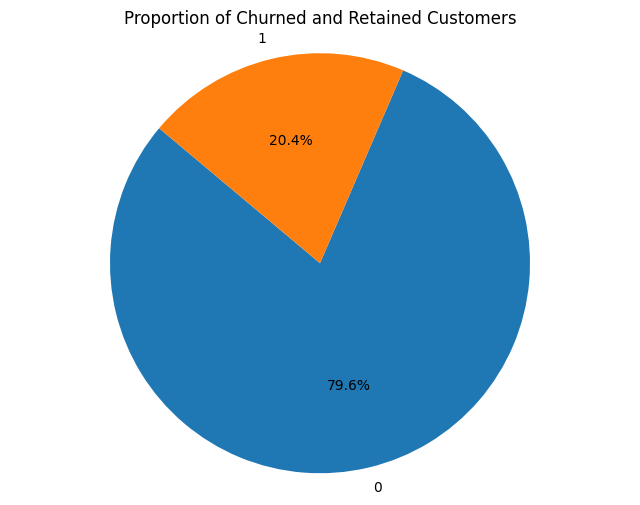

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Churned and Retained Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

We select features with numeric continuous values (integer and float) and discrete values differently so that  appropriate methods/visualization could be applied to each type of feature

We'll start with the numeric continuous values (integer and float)

In [ ]:
df_numeric = df.select_dtypes(include=[int, float])
df_numeric.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
len(df_numeric.columns)


9

Visualization of the numeric features from the dataframe

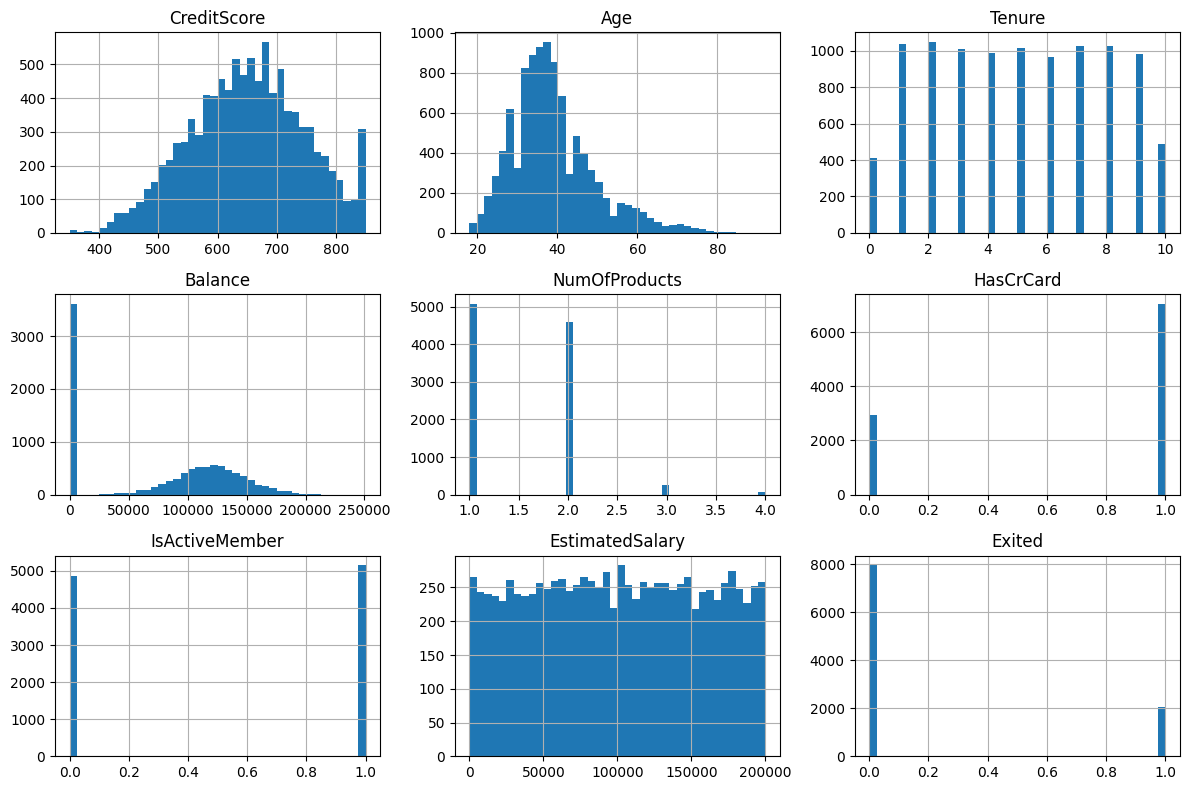

In [ ]:
df_numeric.hist(bins=40,figsize=(12,8))
plt.tight_layout()
plt.show()

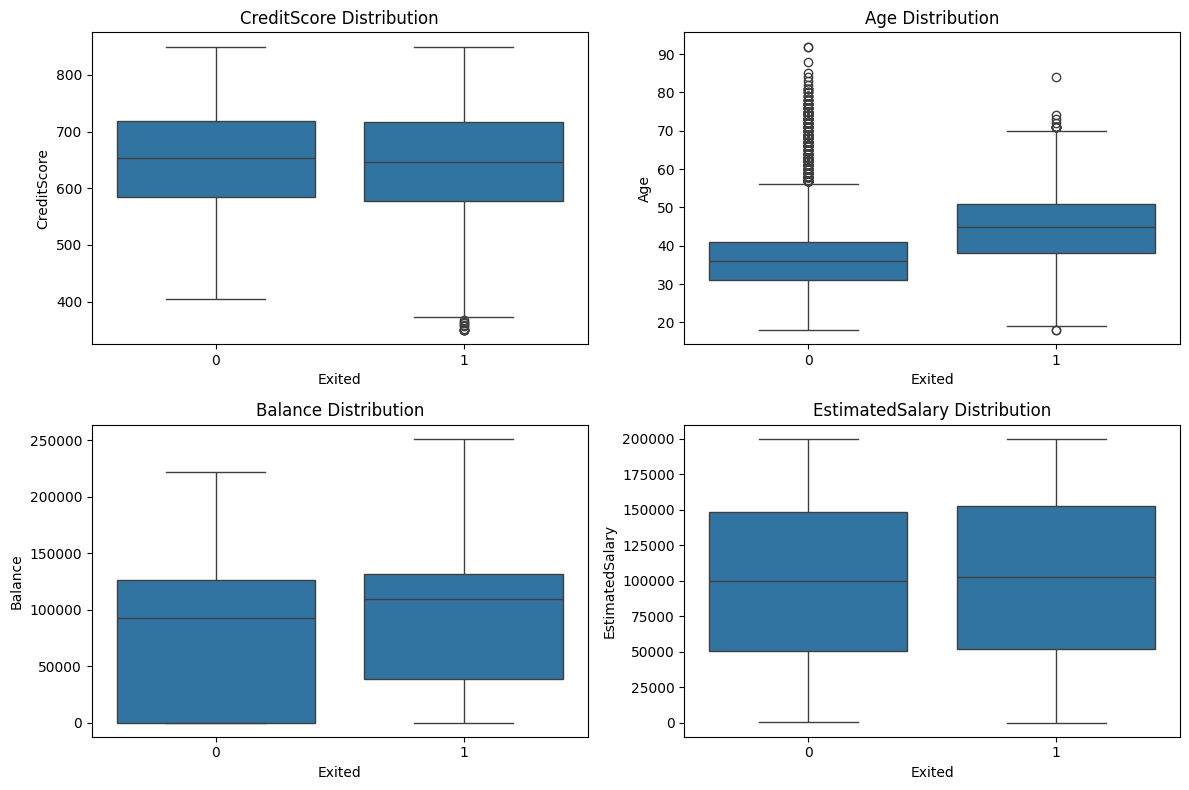

In [ ]:
cont_col = df_numeric[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]

fig, axes = plt.subplots(nrows=len(cont_col.columns) // 2, ncols=2, figsize=(12, 8))

for idx, column in enumerate(cont_col.columns):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxplot(x='Exited', y=column, data=df_numeric, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel('Exited')
    axes[row_idx, col_idx].set_ylabel(column)
    axes[row_idx, col_idx].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()


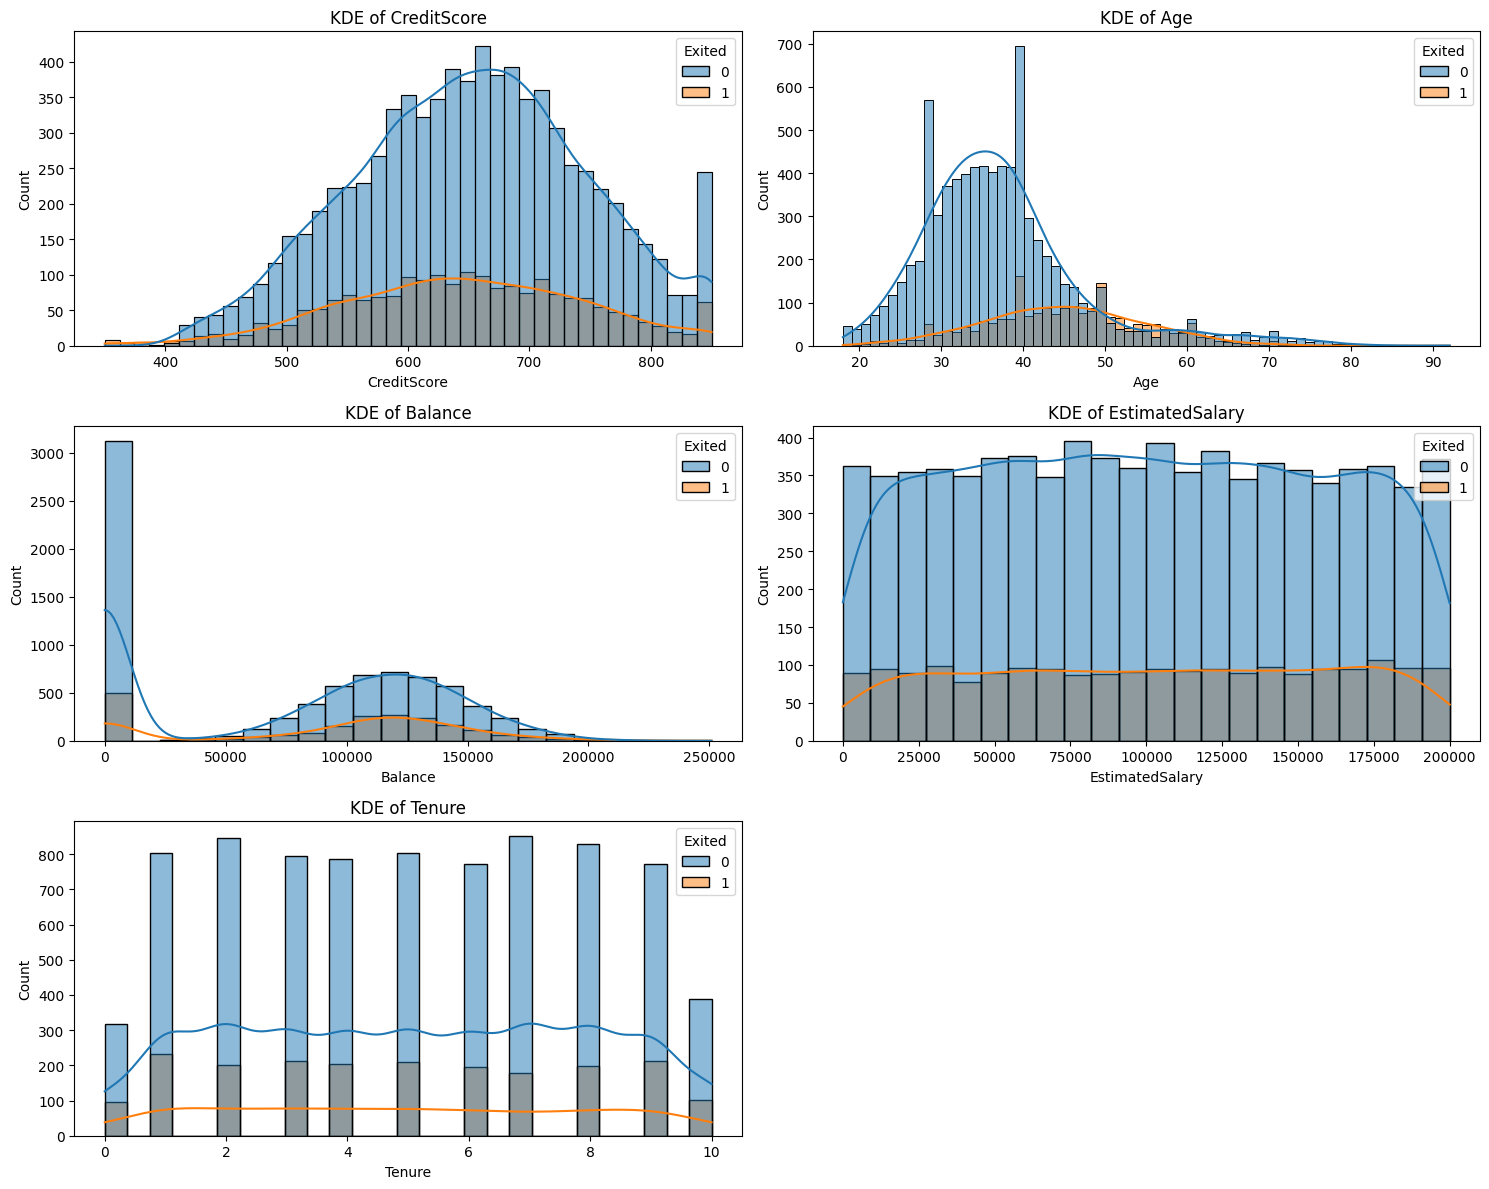

In [ ]:
cont_col = df_numeric[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']]

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Loop through the number of columns and create KDE plots
for i, col in enumerate(cont_col.columns):
    # Create a new subplot for each column
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df_numeric, x=col, fill=True, kde=True, hue='Exited')
    plt.title(f'KDE of {col}')
    plt.tight_layout()

# Show the plots
plt.show()


We'll now select features with discrete values

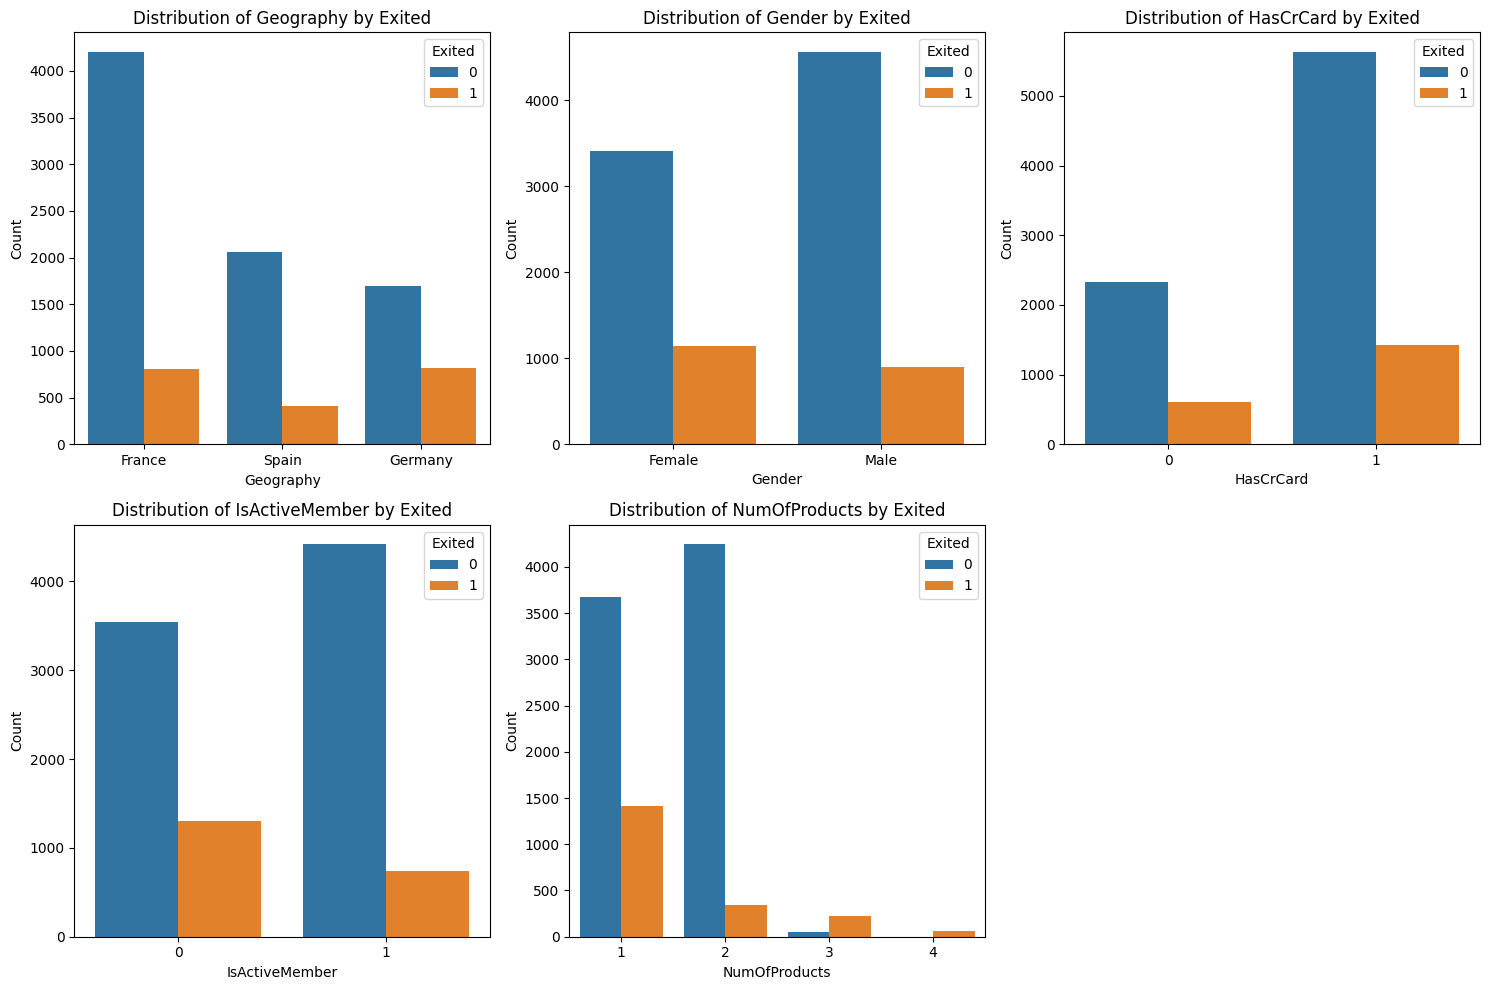

In [ ]:
# list of columns with disCrete values
disc_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']

# Set up the matplotlib figure and axes for a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for i, col in enumerate(disc_cols):
    # Create a count plot for each categorical column with respect to Exited on each subplot
    sns.countplot(data=df, x=col, hue='Exited', ax=axs[i])
    axs[i].set_title(f'Distribution of {col} by Exited')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(len(disc_cols), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


We use heatmap to visualize the correlation of the various features in the dataframe

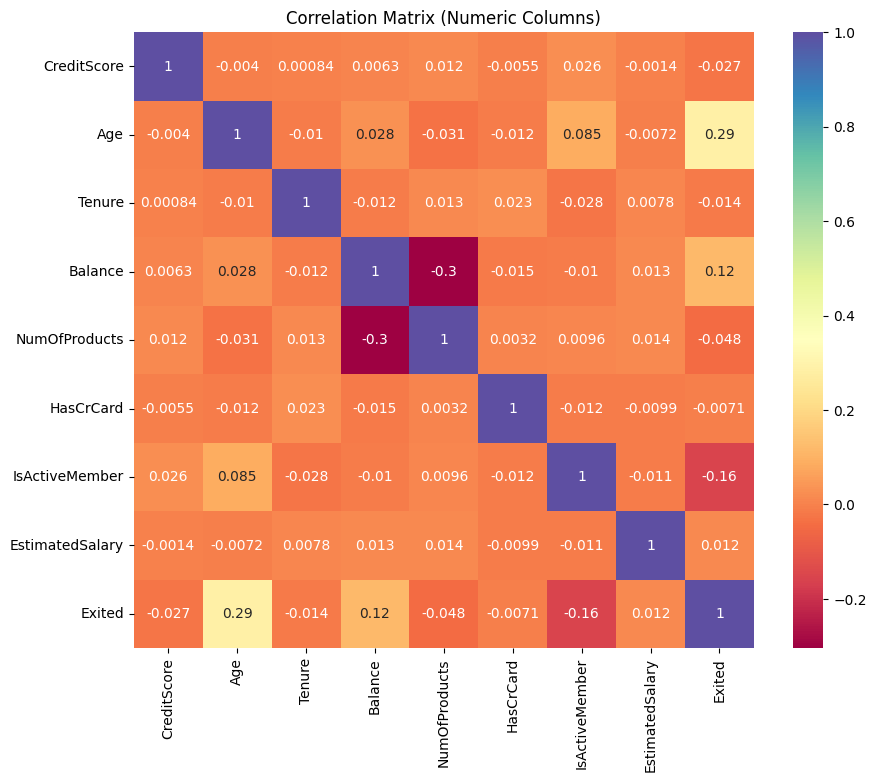

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True,cmap="Spectral")
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

#DATA PREPROCESSING FOR MACHINE LEARNING

In [ ]:
# Importing necessary libraries for machine learning
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score,\
                             classification_report)
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We transform the categorical features into numerical representation using OrdinalEncoder

In [ ]:
# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Columns to encode
columns_to_encode = ['Geography', 'Gender']

# Encode the specified columns
encoded_values = ordinal_encoder.fit_transform(df[columns_to_encode])

# Replace the original columns with the encoded values
df_en = df.copy()
df_en[columns_to_encode] = encoded_values


In [ ]:
df_en

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,1


Splitting the data into training and test set

In [ ]:

#Create features and labels
labels = df_en["Exited"].values

df_en.drop('Exited', axis=1, inplace=True)
features = df_en.values

#Split data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,\
                                                                   test_size=0.2, random_state=26)

In [ ]:
print(test_features.shape)
train_features.shape

(2000, 10)


(8000, 10)

Now that all features are numerical, we standardize them so that all features have the same scale

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to training features and transform training features
train_features_scaled = scaler.fit_transform(train_features)

# Transform test features using the same scaler
test_features_scaled = scaler.transform(test_features)

In [ ]:
train_features_scaled_df = pd.DataFrame(data=train_features_scaled, columns=df_en.columns)
train_features_scaled_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.628269,-0.907555,0.915321,1.238035,-0.000474,-1.225703,-0.914658,0.642207,0.966801,1.039494
1,-0.793816,1.506957,0.915321,0.475412,1.378048,-1.225703,0.800594,0.642207,-1.034339,0.125235
2,-0.051858,-0.907555,0.915321,0.570740,0.344157,1.267043,-0.914658,-1.557131,0.966801,-1.673877
3,0.360340,1.506957,0.915321,-1.526473,-0.000474,1.419170,-0.914658,-1.557131,-1.034339,0.715738
4,1.998829,-0.907555,-1.092513,-0.954506,1.033418,-1.225703,0.800594,-1.557131,-1.034339,0.823151


We use the feature_importance attribute of a RandomForestClassifier to understand the relative importance of different features of our data.

In [ ]:
#Create and train a Random Forest Classfier
model=RandomForestClassifier(random_state=26)
model.fit(train_features_scaled,train_labels)
feature_importance=model.feature_importances_

#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':train_features_scaled_df.columns,'Importance':feature_importance})

#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
feature_importance_df

,Feature,Importance
3,Age,0.235957
9,EstimatedSalary,0.145796
0,CreditScore,0.144261
5,Balance,0.139168
6,NumOfProducts,0.134152
4,Tenure,0.081487
8,IsActiveMember,0.042420
1,Geography,0.038387
2,Gender,0.019945
7,HasCrCard,0.018427


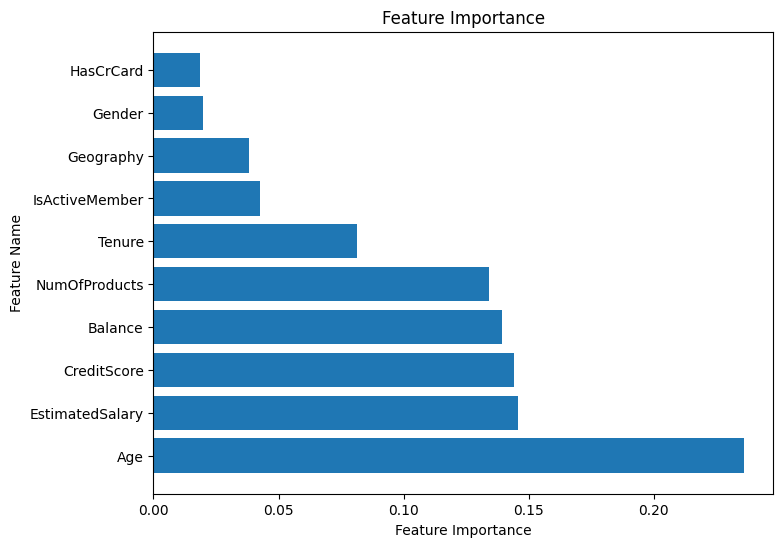

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

#Synthetic Minority Over-sampling Technique (SMOTE)

In our exploratory data analysis (EDA) session, the pie chart revealed that the proportion of 'churn' instances were lower compared to 'not churn' instances. To tackle this class imbalance, we will employ SMOTE to resample the data.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=26)

train_features_sm, train_labels_sm = sm.fit_resample(train_features_scaled, train_labels)

print(f'''Shape of train_features_scaled before SMOTE: {train_features_scaled.shape}
Shape of train_features_scaled after SMOTE: {train_features_sm.shape}''')

print('\nCount  of  positive and negative classes (%): after SMOTE:')
train_labels_smSeries = pd.Series(train_labels_sm)
train_labels_smSeries.value_counts(normalize=True) * 100

Shape of train_features_scaled before SMOTE: (8000, 10)
Shape of train_features_scaled after SMOTE: (12678, 10)

Count  of  positive and negative classes (%): after SMOTE:


0    50.0
1    50.0
Name: proportion, dtype: float64

#HYPERPARAMETER TUNING AND MODEL SELECTION


We'll use hyperparameter tuning and  cross  validation techniques  to optimize  and  evaluate the performance of our  chosen machine learning models  respectively.

In [ ]:
# Define models and their respective hyperparameters to tune
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': range(50, 600, 50)}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': range(3, 21, 2)}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'XGBoost': (XGBClassifier(), {'learning_rate': [0.1, 0.01], 'max_depth': range(3, 30, 3)})
}

# Perform grid search for each model
final_models = {}
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid_search.fit(train_features_sm, train_labels_sm)

    # Retrieve best parameters, best score, and best estimator
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_estimator = grid_search.best_estimator_

    # Print results
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation score for {name}: {best_score}")

    # Store the best estimator
    final_models[name] = best_estimator

Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation score for Logistic Regression: 0.7001900522029132
Best parameters for Decision Tree: {'max_depth': None}
Best cross-validation score for Decision Tree: 0.8317613972212371
Best parameters for Random Forest: {'n_estimators': 500}
Best cross-validation score for Random Forest: 0.9029074347152484
Best parameters for KNN: {'n_neighbors': 3}
Best cross-validation score for KNN: 0.862282057504091
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.8319151127122494
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 12}
Best cross-validation score for XGBoost: 0.897387552187358


We use the best hyperparameters for each respective model gotten above to fit, predict, and compute the accuracy, AUC, and F1-score for each model. Note that from the crossvalidation scores, RandomForestClassifier is the best performing model.

In [ ]:
model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
#Define models and their best performing respective hyperparameters
models=[
     LogisticRegression(C=0.1, random_state=26),
     DecisionTreeClassifier(max_depth=3, random_state=26),
     RandomForestClassifier(n_estimators=350, random_state=26),
     KNeighborsClassifier(n_neighbors=10),
     #SVC(C=1, kernel='rbf', random_state=26),
     XGBClassifier(learning_rate=0.1, max_depth=9, random_state=26)

]

for model in models:
    model.fit(train_features_sm, train_labels_sm)
    prediction = model.predict(test_features_scaled)
    y_predict=model.predict_proba(test_features_scaled)[:, 1]
    model_name.append(model.__class__.__name__)
    accuracy.append((accuracy_score( prediction , test_labels ) * 100 ) )
    roc_auc.append((roc_auc_score(test_labels , y_predict)*100) )
    F1_score.append((f1_score(test_labels , prediction)* 100) )

In [ ]:
model_name_shortened = ['LogisticRegression', 'DecisionTree','RandomForest', 'KNeighbors', 'XGBClassifier']

models_df = pd.DataFrame({"Model-Name":model_name_shortened, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
#models_df = models_df.drop(columns='Model-Name').columns.astype(float)

#models_df.sort_values("AUC", ascending = False)
models_df

,Model-Name,Accuracy,AUC,F1-Score
0,LogisticRegression,69.50,76.146041,45.143885
1,DecisionTree,73.45,80.406600,50.696379
2,RandomForest,84.95,86.020448,60.132450
3,KNeighbors,76.00,80.211882,51.219512
4,XGBClassifier,85.35,85.808288,59.917921


The best performing model, considering all factors (crossvalidation score, Accuracy, AUC, and F1-Score), is RandomForestClassifier

<ipython-input-35-6c2865a4181c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models_df['Model-Name'], rotation=90)


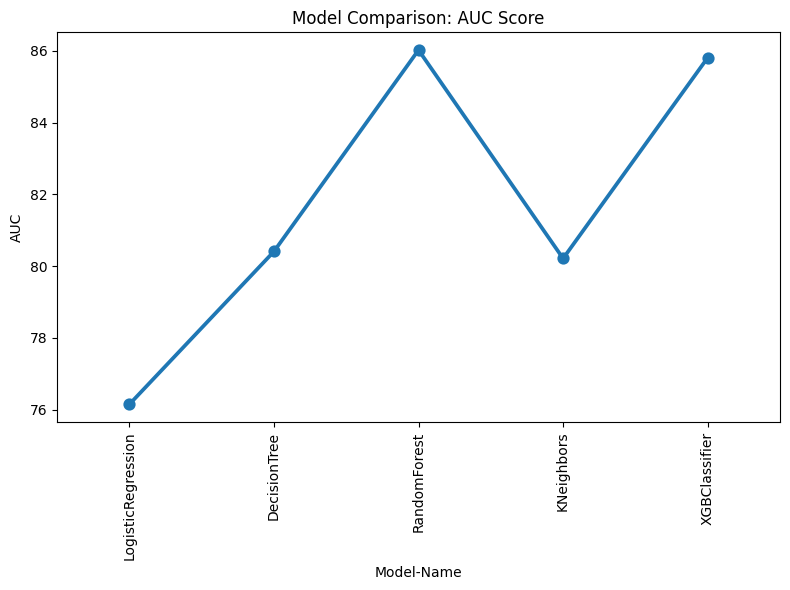

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x='Model-Name', y='AUC', data=models_df, ax=ax)
ax.set_xticklabels(models_df['Model-Name'], rotation=90)
ax.set_title('Model Comparison: AUC Score')
fig.tight_layout()
plt.show()

<ipython-input-36-21dc2967bc8d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models_df['Model-Name'], rotation=90)


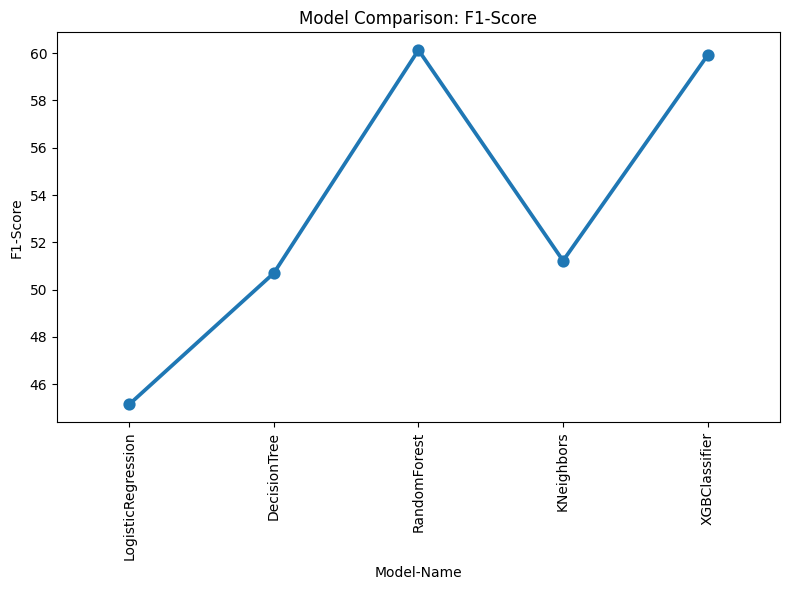

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x='Model-Name', y='F1-Score', data=models_df, ax=ax)
ax.set_xticklabels(models_df['Model-Name'], rotation=90)
ax.set_title('Model Comparison: F1-Score')
fig.tight_layout()
plt.show()

#ASSESSING THE PERFORMANCE OF OUR FINAL MODEL

Our final model is the RandomForestClassifier since it's the best performing model considering all factors (crossvalidation scores, accuracy, AUC, f1-score)

###Classification Report


In [ ]:
# Using the index of the RandomForestClassifier from the model_name list
rforest_model = model_name[2]

# We store the predictions made by the RForestClassifier in rforest_predictions contains
rforest_prediction = prediction
print(rforest_model)
# 'test_labels' contains the true labels for the test set, so we use it to get the classification report
classification_rep = classification_report(test_labels, rforest_prediction)
print("RandomForestlassifier Classification Report:")
print(classification_rep)

RandomForestClassifier
RandomForestlassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1624
           1       0.62      0.58      0.60       376

    accuracy                           0.85      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.85      0.85      0.85      2000



###Confusion Matrix

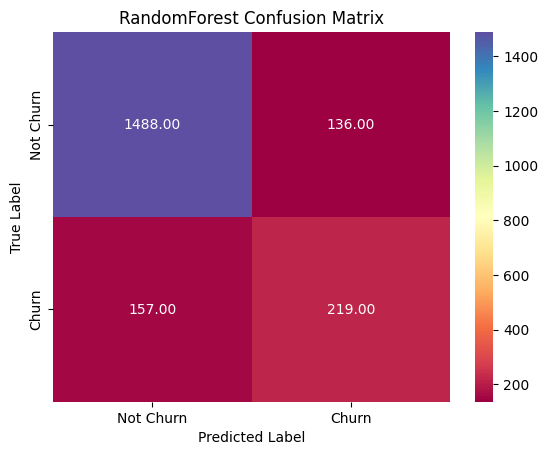

In [ ]:
#Plot heatmap of the confusion matrix of the RandomForest Classifier
#sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion_matrix(test_labels, rforest_prediction), annot=True, cmap='Spectral', fmt='.2f', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('RandomForest Confusion Matrix')
plt.show()